<a href="https://colab.research.google.com/github/btown29/CeazametAnalysis/blob/main/similitud_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IDEA DE PRESENTACIÓN METODOLOGÍA CORRELACIÓN**

1) Qué es la correlación

2) ¿Por qué considero la correlación como estrategía para mi problema?

3) ¿Cómo se puede implementar la correlación en python?

4) Mostrar Resultados 

5) Conclusiones sobre qué se puede inferir a partir de la estrategía de correlación utilizada

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
#limites, como tienen que estar los datos, coeficientes de correlación, datos continuos o discretos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:

%matplotlib inline
from datetime import datetime
import seaborn
import os
import glob
import datetime as dt
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from datetime import datetime
import seaborn as sb
import os
import glob
import datetime as dt
import pandas as pd
from mpl_toolkits.basemap import Basemap
import scipy.cluster.hierarchy as spc

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
     \ 133.1 MB 1.2 MB/s
     |████████████████████████████████| 6.3 MB 35.2 MB/s 
     |████████████████████████████████| 219 kB 67.1 MB/s 
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759604 sha256=1058250b24afdb51f7d3c7e28f1a4d0afd16bab3fbf3c9f6b578080c5cd6bd46
  Stored in directory: /tmp/pip-ephem-wheel-cache-w3metval/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-an

     |████████████████████████████████| 2.8 MB 30.2 MB/s 
  Created wheel for pyproj: filename=pyproj-1.9.6-cp37-cp37m-linux_x86_64.whl size=3702470 sha256=168de2f4fc61f59a505fcd6eabf118de98bc08cecffe2d4eb91926b1c868a08f
  Stored in directory: /root/.cache/pip/wheels/08/60/55/38382877bab48a6abfca7bd66115e287ce5a9530cbce631771
Successfully built pyproj
  Attempting uninstall: pyproj
    Found existing installation: pyproj 3.2.1
    Uninstalling pyproj-3.2.1:
      Successfully uninstalled pyproj-3.2.1


In [4]:
lista_estaciones = ["Andacollo [[]Collowara[]]", "Coquimbo [[]El Panul[]]", "El Jote", "El Tapado", "Estero Derecho", "Gabriela Mistral", "La Laguna [[]Elqui[]]",
                    "La Polvareda [[]INIA[]]", "La Serena [[]CEAZA[]]", "La Serena [[]Cerro Grande[]]", "La Serena [[]El Romeral[]]",
                    "Las Cardas", "Llano de Las Liebres", "Llanos de Huanta", "Los Corrales", "Pan de Azúcar", "Paso Agua Negra",
                    "Pisco Elqui", "Punta Colorada", "Punta de Choros", "Rivadavia", "Tongoy Balsa CMET", "UCN Guayacan", "Vicuña"]

In [5]:
# Creacion DataFrames

estacionesDataFrames = []
for estacion in lista_estaciones:
  files = glob.glob('/content/drive/MyDrive/Electivo Python/Datos/Ceazamet/Datos/Estación '+ estacion + '/*')
  df_aux = pd.DataFrame()
  archivo_estaciones = []
  for file in files:
    df = pd.read_excel(file, skiprows=3, skipfooter=4)
    df['estacion'] = estacion
    archivo_estaciones.append(df)
  df_aux = pd.concat(archivo_estaciones)
  estacionesDataFrames.append(df_aux)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
*** No CODEPAGE record, no encoding_override: will use 'ascii'
WARNING *** OLE2 inconsistency: SSCS size is 0 b

In [6]:
estacionesDataFrame = estacionesDataFrames.copy()
estacionesDataFrame[0].head(3)

,Unnamed: 0,[Min] Â°C Temperatura del Aire[1.5m],[Prom] Â°C Temperatura del Aire[1.5m],[Max] Â°C Temperatura del Aire[1.5m],[%Datos] Temperatura del Aire[1.5m],[Min] % Humedad Relativa[1.5m],[Prom] % Humedad Relativa[1.5m],[Max] % Humedad Relativa[1.5m],[%Datos] Humedad Relativa[1.5m],[Min] m/s Velocidad de Viento[5m],[Prom] m/s Velocidad de Viento[5m],[Max] m/s Velocidad de Viento[5m],[%Datos] Velocidad de Viento[5m],[Min] Â° DirecciÃ³n de viento[5m],[Prom] Â° DirecciÃ³n de viento[5m],[Max] Â° DirecciÃ³n de viento[5m],[%Datos] DirecciÃ³n de viento[5m],[Min] W/mÂ² RadiaciÃ³n Solar[2m],[Prom] W/mÂ² RadiaciÃ³n Solar[2m],[Max] W/mÂ² RadiaciÃ³n Solar[2m],[%Datos] RadiaciÃ³n Solar[2m],[Min] W/mÂ² RadiaciÃ³n PAR[2m],[Prom] W/mÂ² RadiaciÃ³n PAR[2m],[Max] W/mÂ² RadiaciÃ³n PAR[2m],[%Datos] RadiaciÃ³n PAR[2m],[Min] W/mÂ² RadiaciÃ³n Solar[2m].1,[Prom] W/mÂ² RadiaciÃ³n Solar[2m].1,[Max] W/mÂ² RadiaciÃ³n Solar[2m].1,[%Datos] RadiaciÃ³n Solar[2m].1,[Min] hPa PresiÃ³n AtmosfÃ©rica[2m],[Prom] hPa PresiÃ³n AtmosfÃ©rica[2m],[Max] hPa PresiÃ³n AtmosfÃ©rica[2m],[%Datos] PresiÃ³n AtmosfÃ©rica[2m],[Min] mm PrecipitaciÃ³n[1.5m],[Prom] mm PrecipitaciÃ³n[1.5m],[Max] mm PrecipitaciÃ³n[1.5m],[%Datos] PrecipitaciÃ³n[1.5m],[Min] Â°C Temperatura de Suelo[-0.5m],[Prom] Â°C Temperatura de Suelo[-0.5m],[Max] Â°C Temperatura de Suelo[-0.5m],[%Datos] Temperatura de Suelo[-0.5m],[Min] Â°C Temperatura de Suelo[-0.1m],[Prom] Â°C Temperatura de Suelo[-0.1m],[Max] Â°C Temperatura de Suelo[-0.1m],[%Datos] Temperatura de Suelo[-0.1m],[Min] mm EvapotranspiraciÃ³n[0.1m],[Prom] mm EvapotranspiraciÃ³n[0.1m],[Max] mm EvapotranspiraciÃ³n[0.1m],[%Datos] EvapotranspiraciÃ³n[0.1m],[Min] Â°C Punto de RocÃ­o[2m],[Prom] Â°C Punto de RocÃ­o[2m],[Max] Â°C Punto de RocÃ­o[2m],[%Datos] Punto de RocÃ­o[2m],[Min] hf Horas Frio Base 7[2m],[Prom] hf Horas Frio Base 7[2m],[Max] hf Horas Frio Base 7[2m],[%Datos] Horas Frio Base 7[2m],[Min] hf Unidades de Frio Utah[2m],[Prom] hf Unidades de Frio Utah[2m],[Max] hf Unidades de Frio Utah[2m],[%Datos] Unidades de Frio Utah[2m],[Min] gd Grados Dia Base 10[2m],[Prom] gd Grados Dia Base 10[2m],[Max] gd Grados Dia Base 10[2m],[%Datos] Grados Dia Base 10[2m],[Min] W/mÂ² RadiaciÃ³n Onda Larga Incidente[2m],[Prom] W/mÂ² RadiaciÃ³n Onda Larga Incidente[2m],[Max] W/mÂ² RadiaciÃ³n Onda Larga Incidente[2m],[%Datos] RadiaciÃ³n Onda Larga Incidente[2m],[Min] V BaterÃ­a[1.5m],[Prom] V BaterÃ­a[1.5m],[Max] V BaterÃ­a[1.5m],[%Datos] BaterÃ­a[1.5m],estacion
0,2014-01-13 00:00:00,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,Andacollo [[]Collowara[]]
1,2014-01-13 01:00:00,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,Andacollo [[]Collowara[]]
2,2014-01-13 02:00:00,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,NaN,NaN,NaN,0,Andacollo [[]Collowara[]]


In [7]:
for estaciones in estacionesDataFrame:

    estaciones.rename(columns = {'Unnamed: 0': 'Fecha'}, inplace = True)
    if 'Fecha' in estaciones:
      estaciones.set_index('Fecha', inplace = True)
    estaciones.index= pd.to_datetime(estaciones.index)
    estaciones.index = estaciones.index.sort_values()


In [8]:
numero_horas = 24*365*18
date = pd.to_datetime('2004-01-01')
date = dt.datetime(date.year, date.month, date.day) + dt.timedelta(hours=10)
estacionesTotal = pd.DataFrame(index=pd.date_range(date, freq='60min', periods=numero_horas))
estacionesTotal.index.name = "Fecha"

In [9]:
estacionesTotal

""
Fecha
2004-01-01 10:00:00
2004-01-01 11:00:00
2004-01-01 12:00:00
2004-01-01 13:00:00
2004-01-01 14:00:00
...
2021-12-27 05:00:00
2021-12-27 06:00:00
2021-12-27 07:00:00


In [10]:
contador_1 = 0
contador_2 = 0
aux = pd.DataFrame()
for index, estacion in enumerate(estacionesDataFrame):


  if "[Prom] Â°C Temperatura del Aire[1.5m]" in estacion:
    estacionesTotal['Temperatura '+str(estacion.estacion[0])] = estacion[["[Prom] Â°C Temperatura del Aire[1.5m]"]]
    #estacionesTotal.merge(estacion, on="Fecha", how='outer')
    contador_1 += 1
  elif "[Prom] Â°C Temperatura del Aire[2m]" in estacion:
    estacionesTotal['Temperatura '+str(estacion.estacion[0])] = estacion[["[Prom] Â°C Temperatura del Aire[2m]"]]
    #estacionesTotal.merge(estacion, on="Fecha", how='outer')
    contador_2 += 1
  else:
    
    print(estacion.head(3))
print('Estaciones con 1.5 m ' + str(contador_1) )
print('Estaciones con 2.0 m ' + str(contador_2) )

estacionesTotal.drop(columns=['Temperatura Las Cardas'], inplace = True)

                     [Min] m/s Velocidad de Viento[2m]  ...                 estacion
Fecha                                                   ...                         
2004-03-29 00:00:00                              0.431  ...  Coquimbo [[]El Panul[]]
2004-03-29 01:00:00                              0.000  ...  Coquimbo [[]El Panul[]]
2004-03-29 02:00:00                              0.510  ...  Coquimbo [[]El Panul[]]

[3 rows x 65 columns]
                     [Min] U Ph[-25m]  ...      estacion
Fecha                                  ...              
2016-02-03 00:00:00               NaN  ...  Los Corrales
2016-02-03 01:00:00               NaN  ...  Los Corrales
2016-02-03 02:00:00               NaN  ...  Los Corrales

[3 rows x 49 columns]
Estaciones con 1.5 m 14
Estaciones con 2.0 m 8


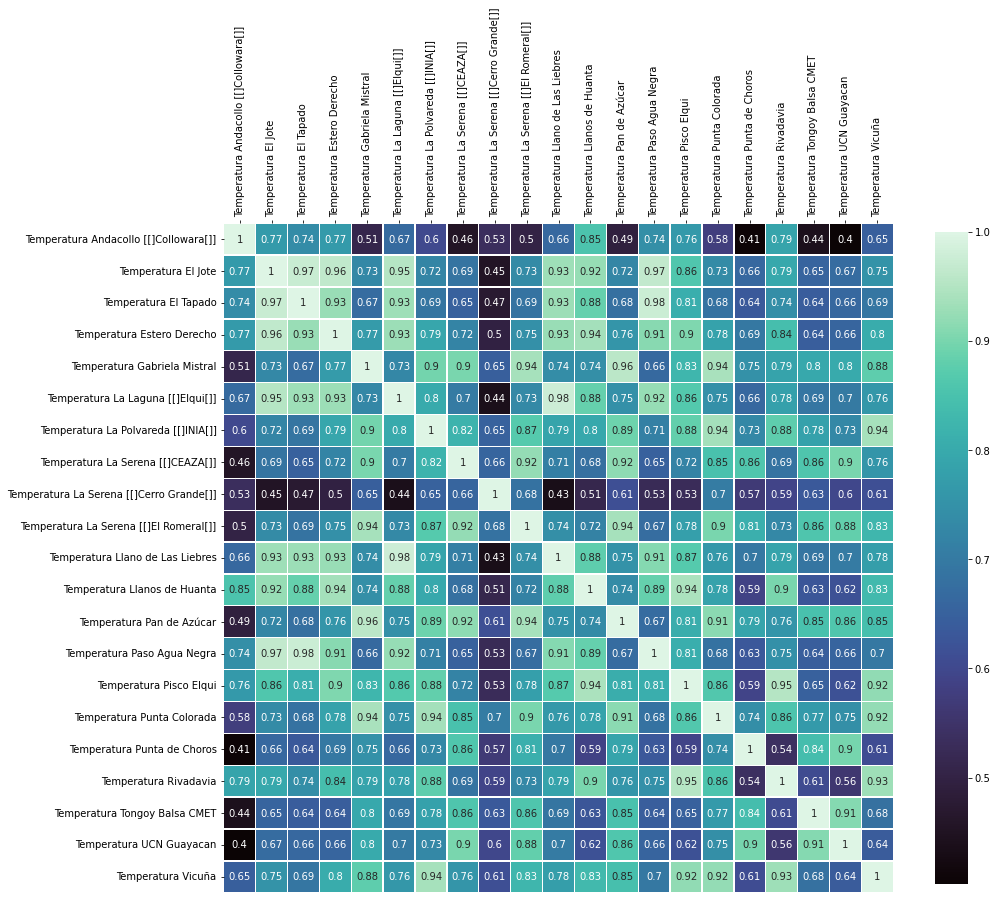

In [42]:
fig, ax = plt.subplots(figsize=(15, 15))
sb.heatmap(estacionesTotal.corr(method='pearson'), cmap = 'mako', linewidth=0.3, cbar_kws={"shrink": .8}, square=True, annot = True)

# xticks
ax.xaxis.tick_top()
xticks_labels = estacionesTotal.columns
plt.xticks(np.arange(21) + .5, labels=xticks_labels, rotation = 90)

# yticks
ax.yaxis.tick_left
yticks_labels = estacionesTotal.columns
plt.yticks(np.arange(21) + .5, labels=yticks_labels, rotation = 0)
plt.show()



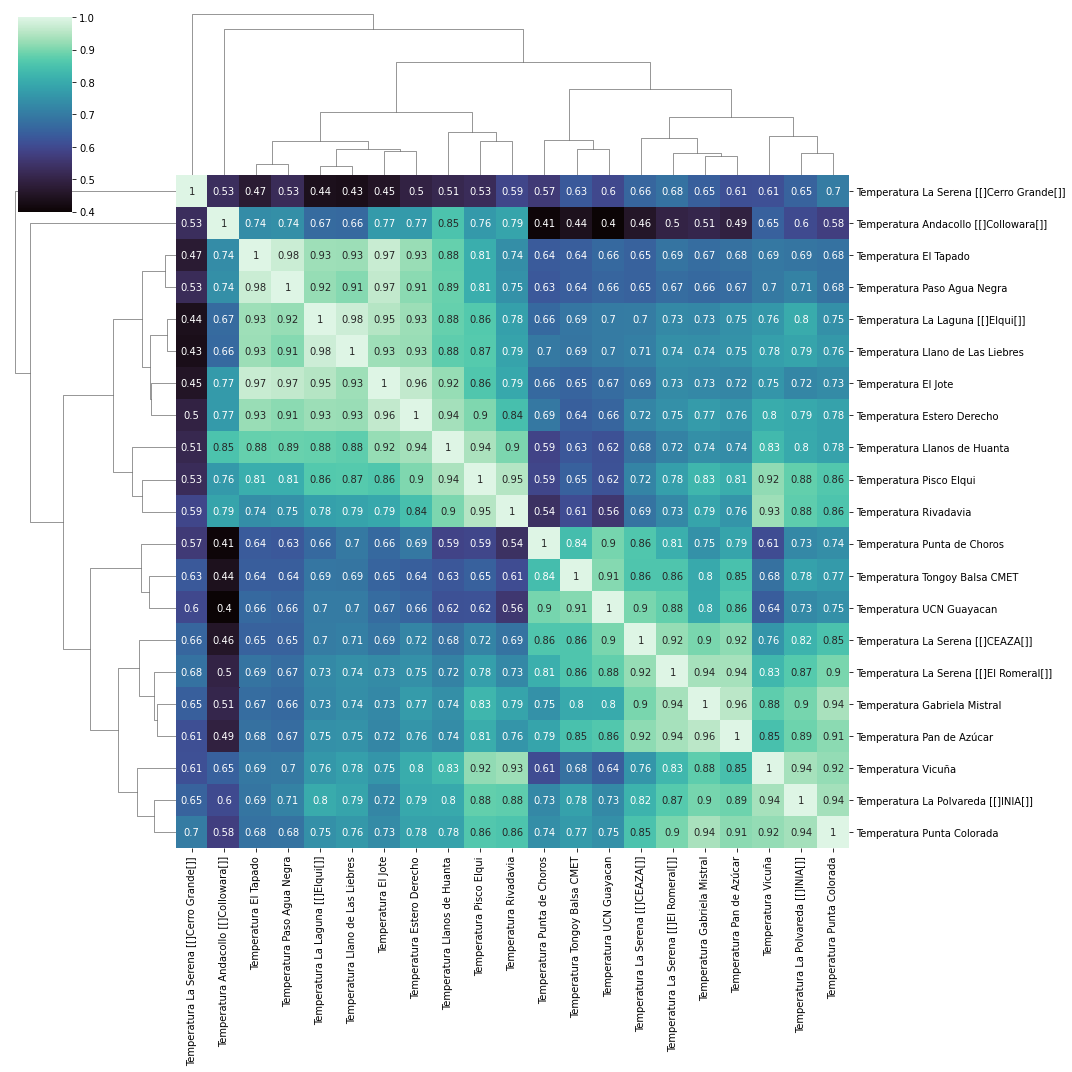

In [49]:
g = sb.clustermap(estacionesTotal.corr(), method='centroid', cmap="mako", vmin=0.4, vmax=1, annot=True, figsize=(15,15))

In [41]:
#Coordenadas
lon = -70.616334
lat = -29.7530093
coordenadas_estaciones = [
   (-30.248700,-71.065300), # Andacollo
   (-30.405266,-70.279483), # El Jote
   ( -30.1583, -69.908179), # El Tapado
   (-30.38407, -70.412858), # Estado Derecho
   ( -29.97852, -71.080386), # Gabriela Mistral
   (-30.203112, -70.037224), # La Laguna Elqui
   ( -29.915015, -71.242214), # La Laguna Ceaza
    ( -30.9, -71.203505), # La Polvareda
   ( -29.938475, -71.223505), # Cerro Grande
   (-29.754064, -71.257442), # El Romeral
   (-30.257406, -69.936986), # Llano de las liebres
   (-29.827418, -70.354471), # LLano de huanta
   (-30.074646, -71.238945), # Pan de Azucar
   (-30.190704, -69.82553), # Paso Agua Negra
   (-30.129028, -70.494712), # Pisco Elqui
   (-29.3541129, -71.0328595), # Punta Colorada
   (-29.24724, -71.467969), # Punta de Choros
   (-29.96173, -70.539081), # Rivadavia
    (-30.348700,-71.665300), # Tongoy Balsa
   (-29.96663, -71.352844), # UCN Guayacan
   (-30.038318, -70.696553) # Vicuña
]

UBICACION DE ESTACIONES


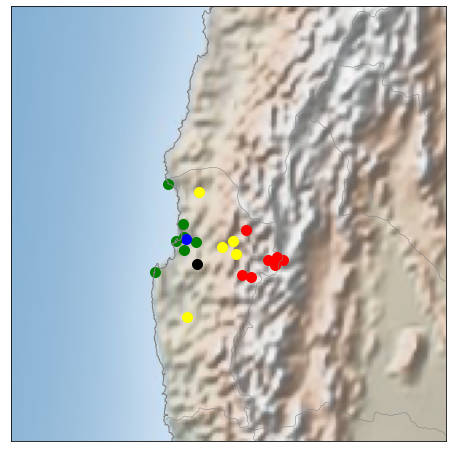

In [51]:
cluster_a = [0]
cluster_b = [8]
cluster_c = [1, 2, 3, 5, 10, 11, 13]
cluster_d = [7, 14, 15, 17, 20]
cluster_e = [4, 6, 9, 12, 16, 18, 19]

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0= -29.75, lon_0=-70.6130093,
            width=6E5, height=6E5)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

lat = -29.97852
lon = -71.080386
# 2. scatter city data, with color reflecting population
# and size reflecting area

for i, coordenada in enumerate(coordenadas_estaciones):
  if(i in cluster_a):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="black", s=100, alpha=1)
  if(i in cluster_b):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="blue", s=100, alpha=1)
  if(i in cluster_c):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="red", s=100, alpha=1)
  if(i in cluster_d):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="yellow", s=100, alpha=1)
  if(i in cluster_e):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="green", s=100, alpha=1)

print('UBICACION DE ESTACIONES')

UBICACION DE ESTACIONES


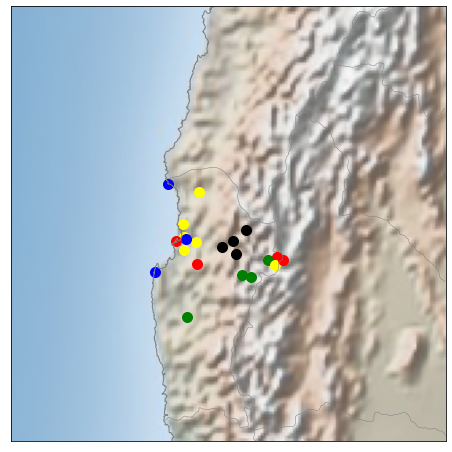

In [50]:
cluster_a = [11, 17, 14, 20]
cluster_b = [16, 18, 8]
cluster_c = [13, 19, 2, 0]
cluster_d = [12, 10, 4, 15, 6, 9]
cluster_e = [5, 1, 7, 3]

fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0= -29.75, lon_0=-70.6130093,
            width=6E5, height=6E5)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

lat = -29.97852
lon = -71.080386
# 2. scatter city data, with color reflecting population
# and size reflecting area

for i, coordenada in enumerate(coordenadas_estaciones):
  if(i in cluster_a):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="black", s=100, alpha=1)
  if(i in cluster_b):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="blue", s=100, alpha=1)
  if(i in cluster_c):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="red", s=100, alpha=1)
  if(i in cluster_d):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="yellow", s=100, alpha=1)
  if(i in cluster_e):
    m.scatter(coordenada[1], coordenada[0], latlon=True, color="green", s=100, alpha=1)

print('UBICACION DE ESTACIONES')